# Coherent two-dimensional spectroscopy of a Fano model

This is the accompanying software to the publication Finkelstein-Shapiro, D.; Poulsen, F.; Pullerits, T. and Hansen, T. "Coherent two-dimensional spectroscopy of a Fano model", Phys. Rev. B, 2016, 94, 205137. Updates can be found at https://finoqs.wordpress.com/software/. Please send any comments and questions to daniel.finkelstein_shapiro@chemphys.lu.se

## Libraries

In [1]:
%matplotlib inline
import numpy as np

import cmath
import math
import scipy
import sympy
import os
from scipy.integrate import quad
from matplotlib.backends.backend_pdf import PdfPages
from sympy.interactive.printing import init_printing
init_printing(use_unicode=False, wrap_line=False, no_global=True)
from IPython.display import display


from matplotlib import cm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

x, y, z, q, ek, wtau, wt, g_c, g_e, GG, w_e, eta = sympy.symbols('x y z q epsilon_k omega_tau omega_t gamma_c gamma_e Gamma omega_e eta')
from sympy import I, sqrt, Integral, integrate, pi, exp, oo

## Response functions

In [2]:
def R1(epsilon_tau, T, epsilon_t, q):
    return (n*Gamma*np.pi*(q**2+1))**2 * np.exp(-(2*gamma_e+eta)*T)/((epsilon_tau+1j)*(epsilon_t+1j))

def R2(epsilon_tau, T, epsilon_t, q):
    return  (n*Gamma*np.pi*(q**2+1))**2 * np.exp(-(2*gamma_e+eta)*T)/((epsilon_tau-1j)*(epsilon_t+1j))

def R3(epsilon_tau, T, epsilon_t, q):
    return  (n*np.pi)**2 * (Gamma*(q-1j)**2/(epsilon_t+1j)-1j) * (Gamma*(q+1j)**2/(epsilon_tau-1j)+1j)

def R4(epsilon_tau, T, epsilon_t, q):
    return (n*np.pi)**2 * (Gamma*(q-1j)**2/(epsilon_tau+1j)-1j) * (Gamma*(q-1j)**2/(epsilon_t+1j)-1j)

## Plot functions

In [3]:
def ensure_dir(f):
    try:
        os.makedirs(f)
    except OSError:
        pass

def plot_pars():
    ensure_dir('Plots')
    size = 8. 
    height_width_ratio = 1. #1.736077 # Aesthetic ratio (GOLDEN MEAN = (np.sqrt(5)-1.0)/2.0) = 1.736077   
    fig_width = 3.33 # width in inches
    fig_height = fig_width/float(height_width_ratio) # height in inches
    fig_size =  [fig_width,fig_height]
    params = {
        "text.usetex": False, #True for final plots
        "axes.labelsize": size,
        "font.size": size, #Size of plt.text(...)
        "legend.fontsize": size,
        "xtick.labelsize": size,
        "ytick.labelsize": size,
        "lines.linewidth": 1.2,
        "lines.markersize": 5,
        "figure.figsize": fig_size,
        "savefig.dpi": 300,     # figure dots per inch
        "savefig.transparent": True,
        "savefig.pad_inches": 0.1}      
        #"savefig.bbox": "tight"} 
    return params

def single_fcontour(X, Y, R, T, q, name):
    plt.rcParams.update(plot_pars())
    
    plt.contourf(X,Y,np.absolute(R))
    plt.colorbar(shrink=0.7)
    plt.xlabel(r"$\epsilon_\tau$")
    plt.ylabel(r"$\epsilon_t$")
    plt.axes().set_aspect('equal')
    plt.show()
    #plt.savefig("Plots/" + name + "_single_fcontour_T_%.2f_q_%.1f.png"%(T, q))
    
    plt.clf()
    plt.close()
    
def subplot_fcontour(X, Y, R, T, q, name):
    plt.rcParams.update(plot_pars())
    
    fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(3,6), sharey=True, sharex=True)
    
    ax0 = axs.flat[0].contourf(X, Y, np.real(R))
    fig.colorbar(ax0, ax=axs.flat[0], shrink=0.9)
    axs.flat[0].set_aspect("equal")
    axs.flat[0].set_adjustable('box-forced')
    
    ax1 = axs.flat[1].contourf(X, Y, np.imag(R))
    fig.colorbar(ax1, ax=axs.flat[1], shrink=0.9)
    axs.flat[1].set_aspect("equal")
    axs.flat[1].set_adjustable('box-forced')
    
    ax2 = axs.flat[2].contourf(X, Y, np.absolute(R))
    fig.colorbar(ax2, ax=axs.flat[2], shrink=0.9)
    axs.flat[2].set_aspect("equal")
    axs.flat[2].set_adjustable('box-forced')

    axs.flat[0].text(7, 8, r'$Re$')
    axs.flat[1].text(7, 8, r'$Im$')
    axs.flat[2].text(7, 8, r'$Abs$')
    
    plt.setp(axs.flat[2], xlabel=r"$\epsilon_\tau$")
    plt.setp(axs.flat[::1], ylabel=r"$\epsilon_t$")
    plt.show()
    #plt.savefig("Plots/" + name + "_subplot_fcontour_T_%.2f_q_%.1f.png"%(T, q))
    
    plt.clf()
    plt.close()
    

def single_surface(X, Y, R, T, q, name):
    plt.rcParams.update(plot_pars())
    
    fig = plt.figure()
    
    ax = fig.gca(projection='3d')
    surf = ax.plot_surface(X, Y, np.absolute(R), cmap=cm.coolwarm, rstride=1, cstride=1, linewidth=0)
    ax.set_xlabel(r'$\epsilon_\tau$')
    ax.set_ylabel(r'$\epsilon_t$')
    ax.set_zlabel(r"$\vert R_2 + R_3\vert$")
    ax.set_aspect("equal")
    #fig.colorbar(surf, shrink=0.5, aspect=5)
    plt.tight_layout(pad=-5.0)
    plt.show()
    #plt.savefig("Plots/" + name + "_single_surface_T_%.2f_q_%.1f.png"%(T, q))
    
    plt.clf()
    plt.close()


def diagonal(x, R, T, q, name):
    plt.rcParams.update(plot_pars())
    plt.plot(x, R, "r-")
    plt.xlabel(r"$\epsilon$")
    plt.ylabel(r"$\vert R_2 + R_3\vert$")
    plt.grid()
    plt.show()
    #plt.savefig("Plots/" + name + "_diagonal_T_%.2f_q_%.1f.png"%(T, q))

    plt.clf()
    plt.close()
    

## Run this

## Constants

In [8]:
gamma_c = 1.
gamma_e = 1.
Gamma = gamma_e/(gamma_e+gamma_c)
omega_e = 1.
n = 1.
eta = 1.

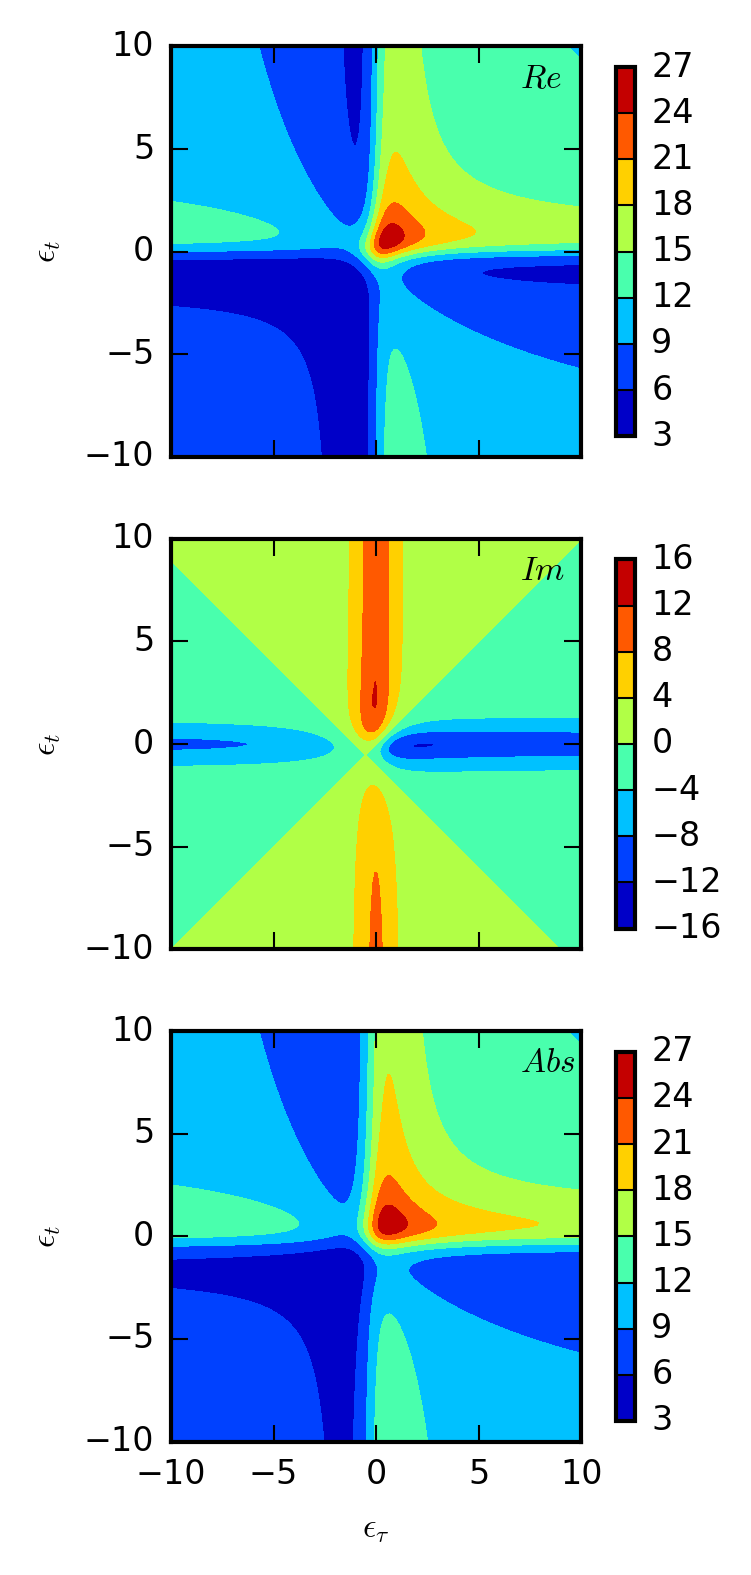

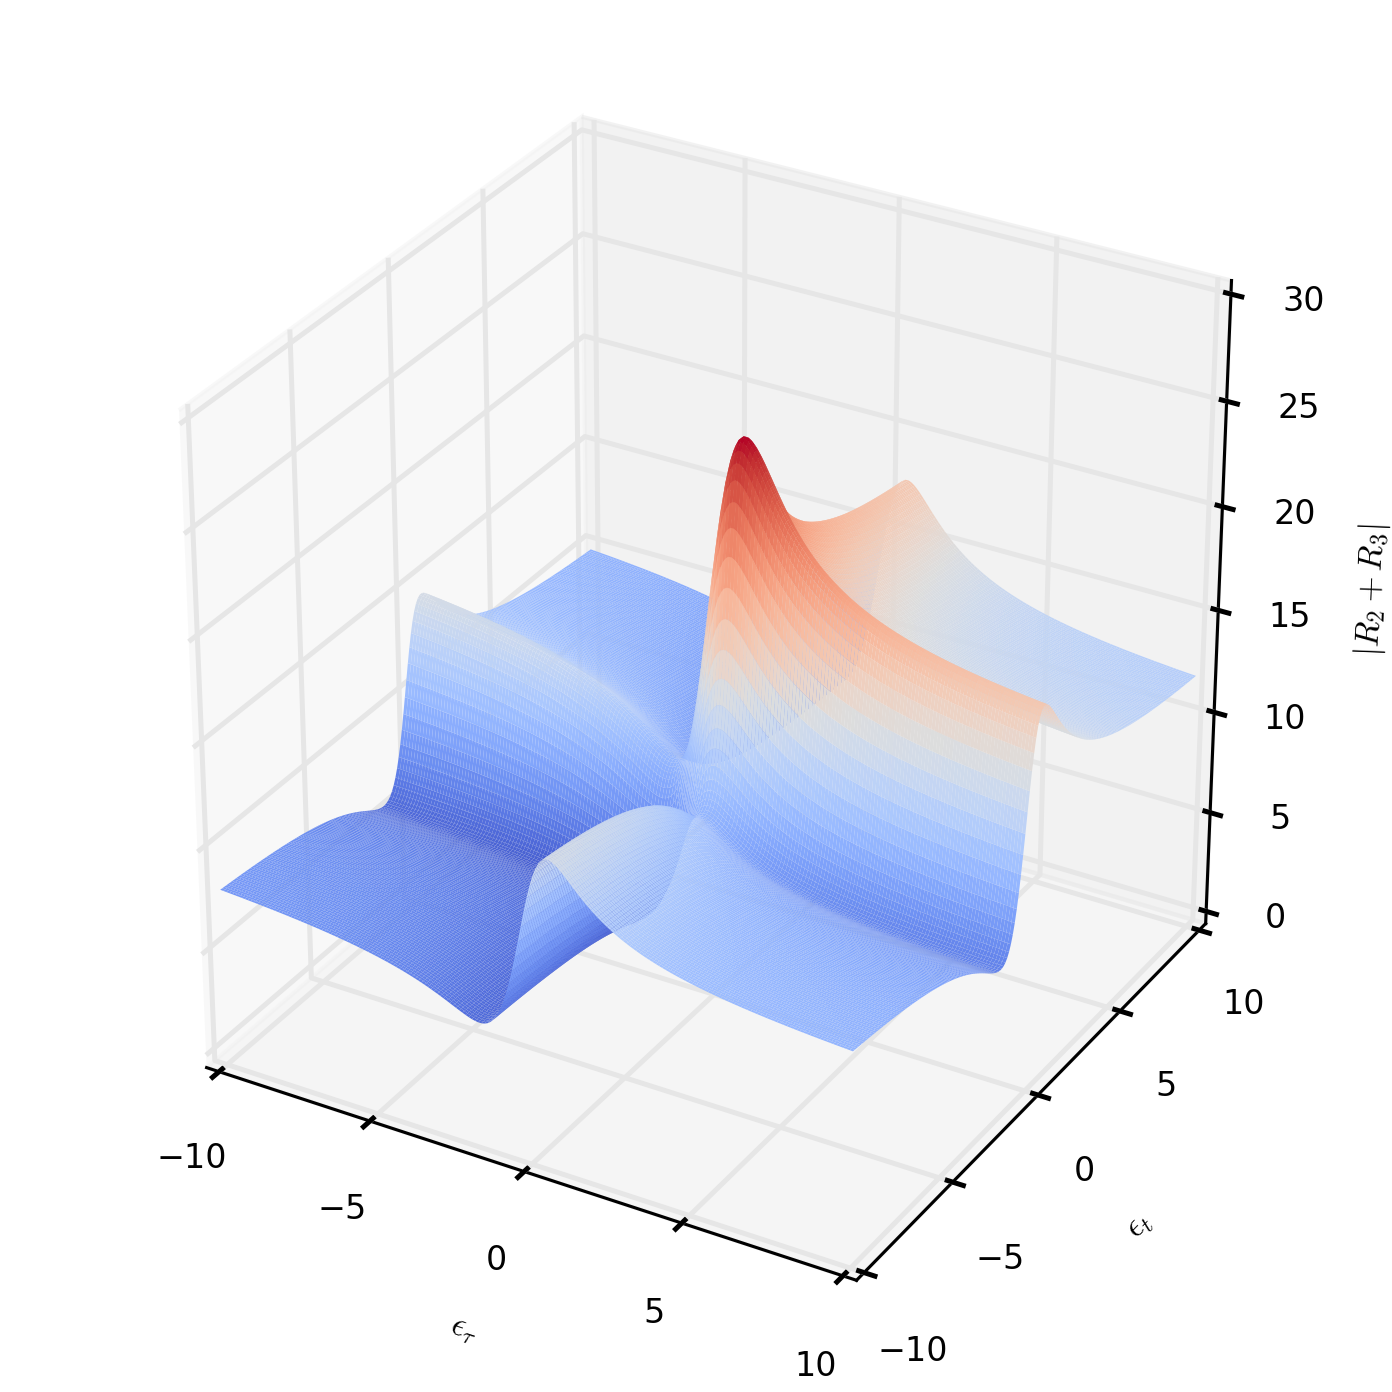

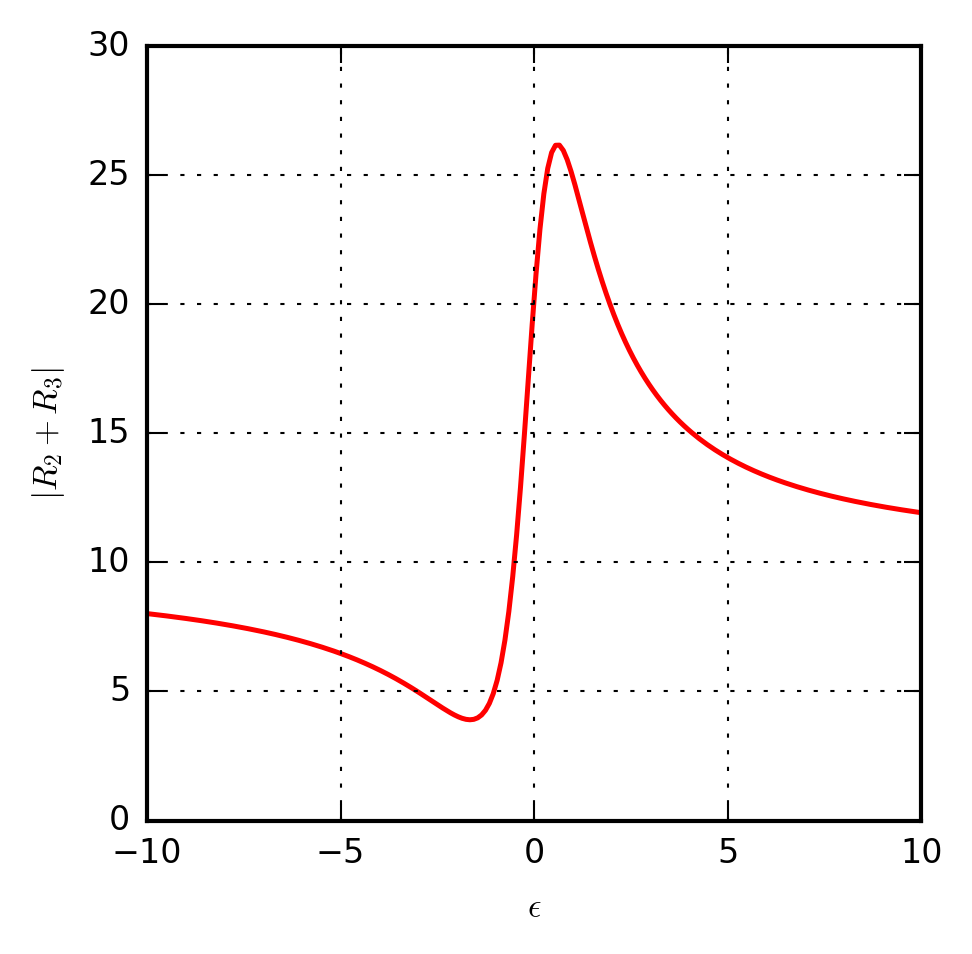

In [9]:
q = 1.
T = 1.

epsilon_tau = np.linspace(-10,10,200)
epsilon_t = np.linspace(-10,10,200)

X_epsilon, Y_epsilon = np.meshgrid(epsilon_tau, epsilon_t, indexing = 'ij')

r1 = R1(X_epsilon, T, Y_epsilon, q)
r2 = R2(X_epsilon, T, Y_epsilon, q)
r3 = R3(X_epsilon, T, Y_epsilon, q)
r4 = R4(X_epsilon, T, Y_epsilon, q)

subplot_fcontour(X_epsilon, Y_epsilon, r2 + r3, T, q, "rephasing")
single_surface(X_epsilon, Y_epsilon, np.absolute(r2 + r3), T, q, "rephasing")
diagonal(X_epsilon.diagonal(), np.absolute(r2.diagonal() + r3.diagonal()), T, q, "rephasing")